In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
def load_data(file_path):
    data = []
    with open(file_path,'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  #Skip the first row it is text
        for row in csvreader:
            data.append(row)
    return np.array(data)
def mean_and_covariance(x,y,custom_covariance=None):
    n_classes= len(np.unique(y))
    no_of_features= x.shape[1]
    means= np.zeros((n_classes,no_of_features))
    covariances =np.zeros((1, no_of_features, no_of_features))
    for c in range(1):
        xyc =x[y ==c]
        means[c] = np.mean(xyc, axis=0)
        if custom_covariance is None and c==0:
            ct =xyc-means[c]
            covariances[c] =np.dot(ct.T, ct)/(xyc.shape[0] - 1) +np.eye(no_of_features)*0.01
    return means,covariances
def Question2(train_x,train_y,test_x,test_y,cov_matrix):
  #function for calculating and ploting the confusion matrix using sns library
  def plt_confusion_matrix(y_true, y_pred, num_classes):
    k = np.zeros((num_classes, num_classes))
    #Plot the confusion matrix using sns heatmap
    for i in range(num_classes):
        for j in range(num_classes):
            k[i, j] = np.sum((y_true == i) & (y_pred == j))
    print(k)
    total = np.sum(k)
    percentages = (k / total) * 100
    new_column=[]
    for i in range(len(k)):
      new_column.append(100*k[i][i]/np.sum(k[i]))
    print(new_column)
    new_row=[]
    k=k.T
    for i in range(len(k)):
      new_row.append(100*k[i][i]/np.sum(k[i]))
    l=np.sum(new_row)/(len(new_row))
    new_row.append(np.sum(new_row)/(len(new_row)))
    k=k.T
    print(new_row)
    percentage=np.hstack((k,np.array([new_column]).T))
    percentage=np.vstack((percentage,np.array([new_row])))
    k=percentage

    #Create heatmap with annotations
    fig,ax = plt.subplots(figsize=(8,8))  #Set figsize to increase the size of cells
    im = ax.imshow(k,cmap='Dark2')

    #Loop over data dimensions and create text
    for i in range(len(k)):
        for j in range(len(k[0])):
            #Add confusion matrix text
            if i!=len(k)-1 and j!=len(k)-1:
              ax.text(j,i+0.15,f'{percentages[i,j]:.2f}%',ha="center",va="center",color="black",fontsize=9)
              ax.text(j,i,f'{k[i,j]:}',ha="center",va="center",color="black")
            else:
              ax.text(j,i,f'{k[i,j]:.1f}'+'%',ha="center",va="center",color="black")
              ax.text(j,i+0.15,f'{100-k[i,j]:.1f}'+'%', ha="center",va="center",color="black",fontsize=9)
    #Set ticks and axis labels
    ax.set_xticks(np.arange(len(k)-1))
    ax.set_yticks(np.arange(len(k)-1))
    ly=[]
    for a in range(len(k)-1):
      ly.append('class '+str(a))
    ax.set_xticklabels(ly)
    ax.set_yticklabels(ly)
    ax.set_xlabel('Target Class')
    ax.set_ylabel('Output Class')
    ax.xaxis.set_label_coords(0.5,-0.08)
    ax.yaxis.set_label_coords(-0.2,0.5)
    ax.grid(False)
    ax.set_title(f"Confusion Matrix with accuracy {l:1f}%")    
    fig.colorbar(im)
    plt.show()

  def mean_and_covariance(x,y,custom_covariance):
      num_classes= len(np.unique(y))
      num_of_features= x.shape[1]
      means= np.zeros((num_classes,num_of_features))
      covariances =np.zeros((num_classes, num_of_features, num_of_features))
      for c in range(num_classes):
          xyc =x[y ==c]
          means[c] = np.mean(xyc, axis=0)
          if custom_covariance is None:
              ct =xyc-means[c]
              covariances[c] =np.dot(ct.T, ct)/(xyc.shape[0] - 1) +np.eye(num_of_features)*0.01
          else:
              covariances[c]=custom_covariance
      return means,covariances
  def pdf(x,mean,covariance):
      n_features =x.shape[0]
      det =np.linalg.det(covariance)
      inv =np.linalg.inv(covariance)
      diff= x-mean
      exp= -0.5*np.dot(np.dot(diff.T, inv),diff)
      factor =1/((2 * np.pi)**(n_features/2)*np.sqrt(det))
      return factor*np.exp(exp)
  def predict(x,means,covariances,priors):
      n_classes =len(priors)
      posteriors= np.zeros(n_classes)
      for c in range(n_classes):
          likelihood=pdf(x,means[c],covariances[c])
          posterior =likelihood*priors[c]
          posteriors[c]=posterior
      return np.argmax(posteriors)
  def accuracy(y_true,y_pred):
      return np.mean(y_true==y_pred)

      
  #mean and covariance matrix for each class in the training data
  means, covariances =mean_and_covariance(train_x, train_y,cov_matrix)
  print(covariances)
  n_samples = train_x.shape[0]
  #prior probability for each class
  priors = np.bincount(train_y) / n_samples
  #make predictionon the test data
  train_predict=np.zeros(train_y.shape[0])
  for i in range(train_x.shape[0]):
      x=train_x[i]
      train_predict[i]=predict(x, means,covariances,priors)
  train_accuracy =accuracy(train_y,train_predict)
  train_predict= np.zeros(train_y.shape[0])
  for i in range(train_x.shape[0]):
      x=train_x[i]
      train_predict[i]=predict(x,means,covariances,priors)

  #calculate the accuracy of the prediction
  train_accuracy=accuracy(train_y,train_predict)
  print(f'train accuracy:{train_accuracy:.4f}')
  num_classes=len(np.unique(train_y))
  print('training data confusion')
  plt_confusion_matrix(train_y,train_predict,num_classes)

  test_predictions =np.zeros(test_y.shape[0])
  for i in range(test_x.shape[0]):
      x=test_x[i]
      test_predictions[i] =predict(x, means, covariances, priors)


  #calculate the accuracy of the predictions
  test_accuracy=accuracy(test_y,test_predictions)
  test_predictions=np.zeros(test_y.shape[0])
  for i in range(test_x.shape[0]):
      x=test_x[i]
      test_predictions[i]= predict(x,means,covariances,priors)

  #Calculate the accuracy of the predictions
  test_accuracy=accuracy(test_y,test_predictions)
  print(f'test accuracy:  {test_accuracy:.4f}')
  num_classes=len(np.unique(test_y))
  print('test data confusion')
  plt_confusion_matrix(test_y,test_predictions,num_classes)
  #a meshgrid that covers the region of interest
  y_min,y_max = test_x[:,1].min()-1,test_x[:,1].max()+1
  x_min,x_max = test_x[:,0].min()-1,test_x[:,0].max()+1
  xx,yy = np.meshgrid(np.arange(x_min,x_max,0.01),np.arange(y_min,y_max,0.1))
  #predictions for each point in the meshgrid
  Z=np.zeros(xx.shape)
  for i in range(xx.shape[0]):
      for j in range(xx.shape[1]):
          x = np.array([xx[i,j], yy[i,j]])
          Z[i,j] = predict(x,means,covariances,priors)


  #Ploting the decision boundary
  plt.xlabel('x coordinate')
  plt.ylabel('y coordinate')
  plt.scatter(test_x[:,0],test_x[:,1])
  plt.title('Plot of the test data along with your classification boundary')
  plt.contourf(xx,yy,Z,alpha=0.1)

Part a:
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
train accuracy:0.9980
training data confusion
[[167.   0.   0.]
 [  1. 166.   0.]
 [  0.   0. 166.]]
[100.0, 99.40119760479043, 100.0]
[99.4047619047619, 100.0, 100.0, 99.8015873015873]


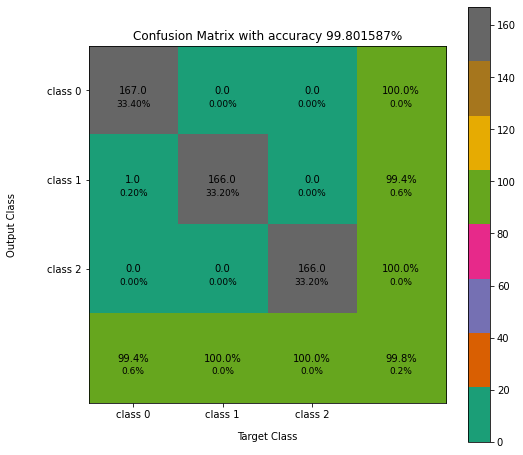

test accuracy:  1.0000
test data confusion
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]
[100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0]


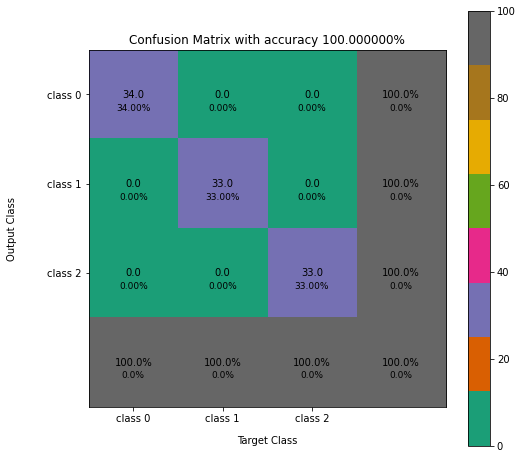

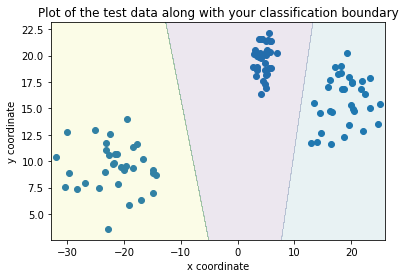

In [5]:

import csv
# Load train data
train_data=load_data('train_35_dataset2.csv')
train_x =train_data[:,:2].astype(np.float32)  # Extract x values
train_y =train_data[:, 2].astype(np.int32)  # Extract labels
# Load test data
test_data=load_data('test_35_dataset2.csv')
test_x =test_data[:,:2].astype(np.float32)  # Extract x values
test_y =test_data[:, 2].astype(np.int32)  # Extract labels
print("Part a:")
Question2(train_x,train_y,test_x,test_y,[[1,0],[0,1]])

Part c:
[[[1.26347033 0.06243069]
  [0.06243069 1.35081738]]

 [[1.26347033 0.06243069]
  [0.06243069 1.35081738]]

 [[1.26347033 0.06243069]
  [0.06243069 1.35081738]]]
train accuracy:0.9980
training data confusion
[[167.   0.   0.]
 [  1. 166.   0.]
 [  0.   0. 166.]]
[100.0, 99.40119760479043, 100.0]
[99.4047619047619, 100.0, 100.0, 99.8015873015873]


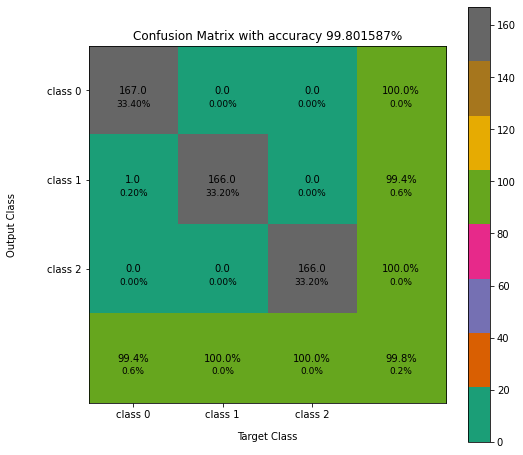

test accuracy:  1.0000
test data confusion
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]
[100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0]


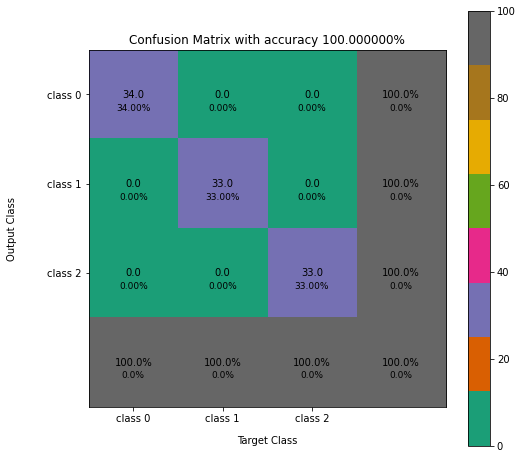

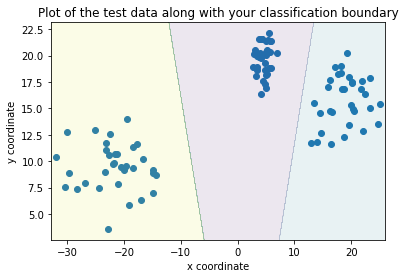

In [6]:
print("Part c:")
mean,covariance=mean_and_covariance(train_x,train_y)
# print(covariance)
Question2(train_x,train_y,test_x,test_y,covariance)

Part e:
[[[ 1.26347033  0.06243069]
  [ 0.06243069  1.35081738]]

 [[10.14131225 -0.61693034]
  [-0.61693034  4.78897433]]

 [[21.89483863 -0.48405102]
  [-0.48405102  5.07259597]]]
train accuracy:1.0000
training data confusion
[[167.   0.   0.]
 [  0. 167.   0.]
 [  0.   0. 166.]]
[100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0]


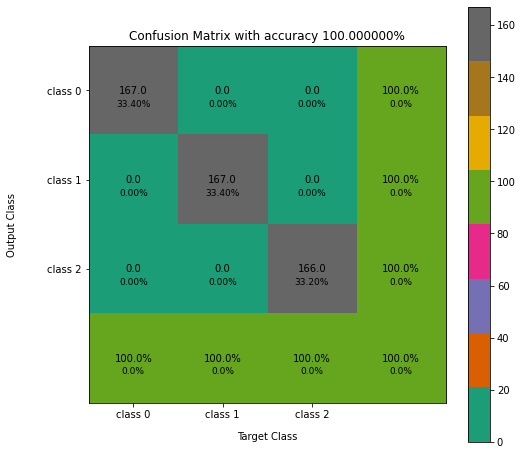

test accuracy:  1.0000
test data confusion
[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]
[100.0, 100.0, 100.0]
[100.0, 100.0, 100.0, 100.0]


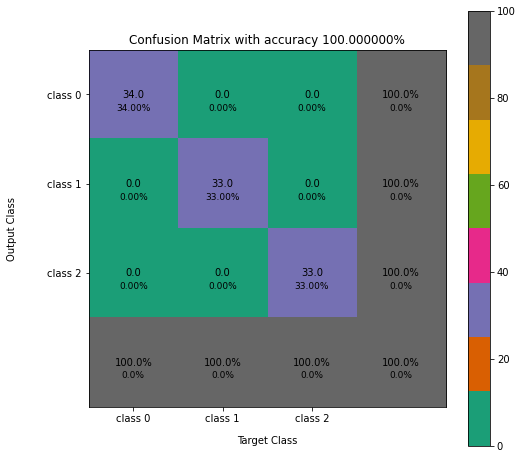

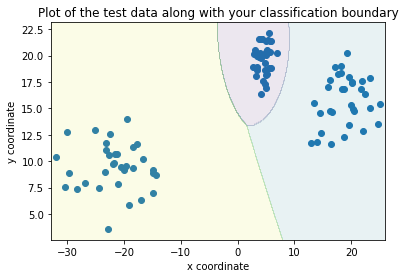

In [7]:
print("Part e:")
Question2(train_x,train_y,test_x,test_y,None)

Part b:
[[[1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]]]
train accuracy:0.7860
training data confusion
[[196.  54.]
 [ 53. 197.]]
[78.4, 78.8]
[78.714859437751, 78.48605577689243, 78.60045760732172]


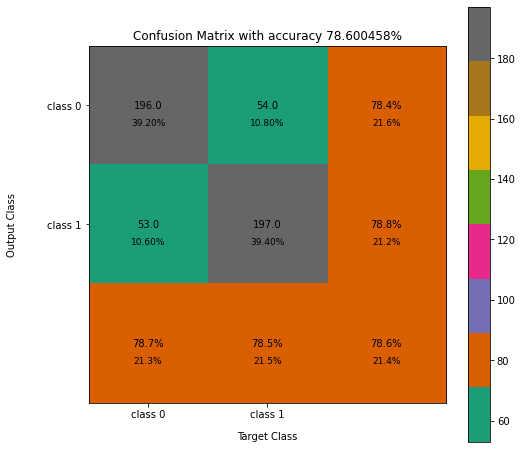

test accuracy:  0.7900
test data confusion
[[39. 11.]
 [10. 40.]]
[78.0, 80.0]
[79.59183673469387, 78.43137254901961, 79.01160464185674]


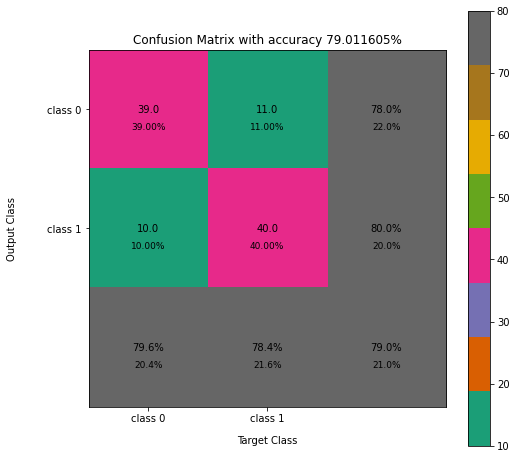

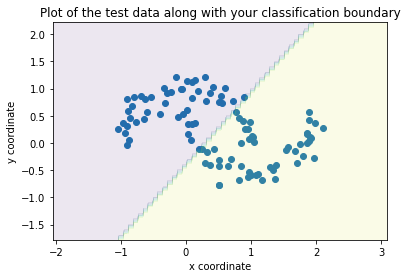

In [8]:

import csv
# Load train data
train_data=load_data('train_35_dataset3.csv')
train_x =train_data[:,:2].astype(np.float32)  # Extract x values
train_y =train_data[:, 2].astype(np.int32)  # Extract labels
# Load test data
test_data=load_data('test_35_dataset3.csv')
test_x =test_data[:,:2].astype(np.float32)  # Extract x values
test_y =test_data[:, 2].astype(np.int32)  # Extract labels
print("Part b:")
Question2(train_x,train_y,test_x,test_y,[[1,0],[0,1]])

Part d:
[[[ 5.29047122e-01 -1.10542473e-04]
  [-1.10542473e-04  1.54622155e-01]]

 [[ 5.29047122e-01 -1.10542473e-04]
  [-1.10542473e-04  1.54622155e-01]]]
train accuracy:0.8400
training data confusion
[[209.  41.]
 [ 39. 211.]]
[83.6, 84.4]
[84.2741935483871, 83.73015873015873, 84.00217613927292]


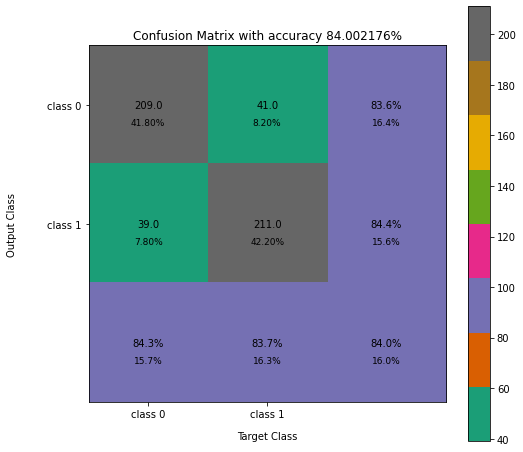

test accuracy:  0.8400
test data confusion
[[42.  8.]
 [ 8. 42.]]
[84.0, 84.0]
[84.0, 84.0, 84.0]


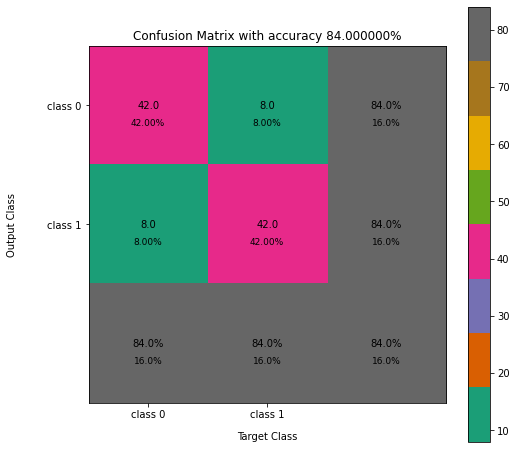

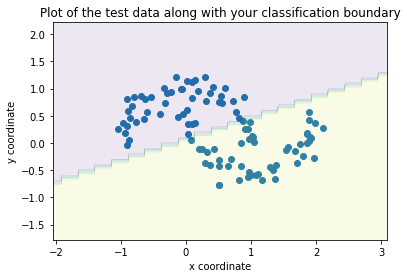

In [9]:
print("Part d:")
mean,covariance=mean_and_covariance(train_x,train_y)
# print(covariance)
Question2(train_x,train_y,test_x,test_y,covariance)

Part f:
[[[ 5.29047122e-01 -1.10542473e-04]
  [-1.10542473e-04  1.54622155e-01]]

 [[ 5.16557135e-01 -8.32216670e-03]
  [-8.32216670e-03  1.37856442e-01]]]
train accuracy:0.8440
training data confusion
[[210.  40.]
 [ 38. 212.]]
[84.0, 84.8]
[84.6774193548387, 84.12698412698413, 84.40220174091141]


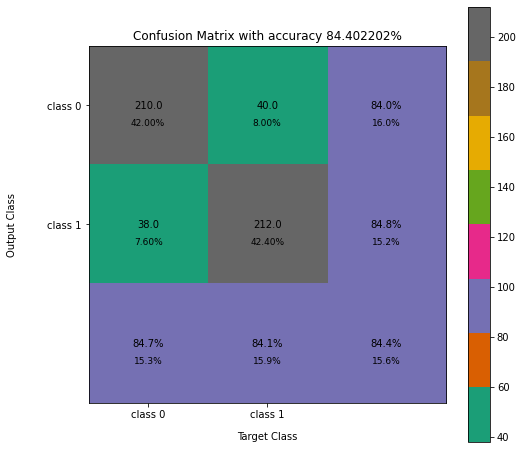

test accuracy:  0.8400
test data confusion
[[42.  8.]
 [ 8. 42.]]
[84.0, 84.0]
[84.0, 84.0, 84.0]


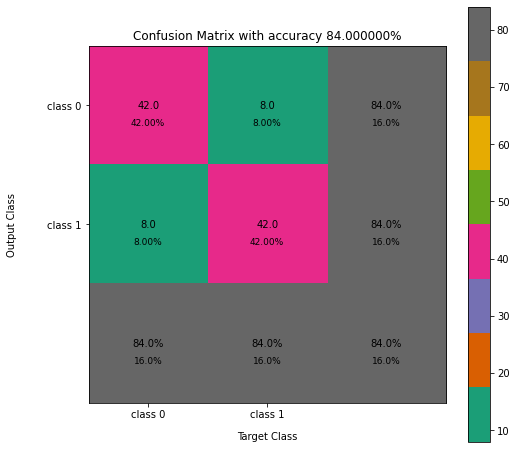

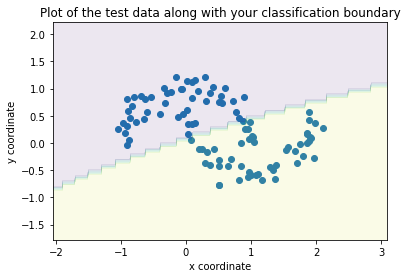

In [10]:
print("Part f:")
Question2(train_x,train_y,test_x,test_y,None)